In [1]:
from pyiron_workflow import Workflow

In [2]:
@Workflow.wrap.as_function_node()
def add_x_and_y(x, y):
    z = x + y
    return z

In [3]:
@Workflow.wrap.as_function_node()
def add_x_and_y_and_z(x, y, z):
    w = x + y + z
    return w

In [4]:
wf = Workflow("my_workflow")

In [5]:
wf.x = 1
wf.y = 2
wf.z = add_x_and_y(x=wf.x, y=wf.y)
wf.w = add_x_and_y_and_z(x=wf.x, y=wf.y, z=wf.z)

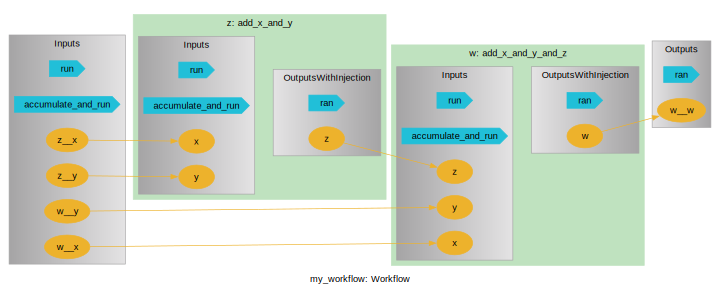

In [6]:
wf.draw(size=(10,10))

In [7]:
wf.run()

{'w__w': 6}

In [8]:
wf.to_dict()

{'label': 'my_workflow',
 'nodes': {'z': {'label': 'z',
   'ready': True,
   'connected': True,
   'fully_connected': False,
   'inputs': {'label': 'Inputs',
    'connected': False,
    'fully_connected': False,
    'channels': {'x': {'label': 'x',
      'connected': False,
      'connections': [],
      'value': '1',
      'ready': True,
      'type_hint': 'None'},
     'y': {'label': 'y',
      'connected': False,
      'connections': [],
      'value': '2',
      'ready': True,
      'type_hint': 'None'}},
    'ready': True},
   'outputs': {'label': 'OutputsWithInjection',
    'connected': True,
    'fully_connected': True,
    'channels': {'z': {'label': 'z',
      'connected': True,
      'connections': ['w.z'],
      'value': '3',
      'ready': True,
      'type_hint': 'None'}},
    'ready': True},
   'signals': {'input': {'label': 'InputSignals',
     'connected': False,
     'fully_connected': False,
     'channels': {'run': {'label': 'run',
       'connected': False,
       '